In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [5]:
geo_data = gpd.read_file(r'C:\Users\xelor\Downloads\Firefighter Vehicle Placement\data\FireIncidentDensity.geojson')
geo_data

,id,geometry
0,None,POINT (-7.61243 33.5936)
1,None,POINT (-7.62698 33.5936)
2,None,POINT (-7.63249 33.59402)
3,None,POINT (-7.63901 33.58942)
4,None,POINT (-7.64353 33.57814)
...,...,...
149,None,POINT (-7.48907 33.59778)
150,None,POINT (-7.48957 33.60362)
151,None,POINT (-7.52116 33.59527)
152,None,POINT (-7.54323 33.58566)


In [6]:
print("Columns of this geojson data : ", geo_data.columns)

Columns of this geojson data :  Index(['id', 'geometry'], dtype='object')


In [7]:
# Extract coordinates from the 'geometry' column
geo_data['x'] = geo_data.geometry.centroid.x
geo_data['y'] = geo_data.geometry.centroid.y

C:\Users\xelor\AppData\Local\Temp\ipykernel_16340\2988271730.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_data['x'] = geo_data.geometry.centroid.x
C:\Users\xelor\AppData\Local\Temp\ipykernel_16340\2988271730.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_data['y'] = geo_data.geometry.centroid.y


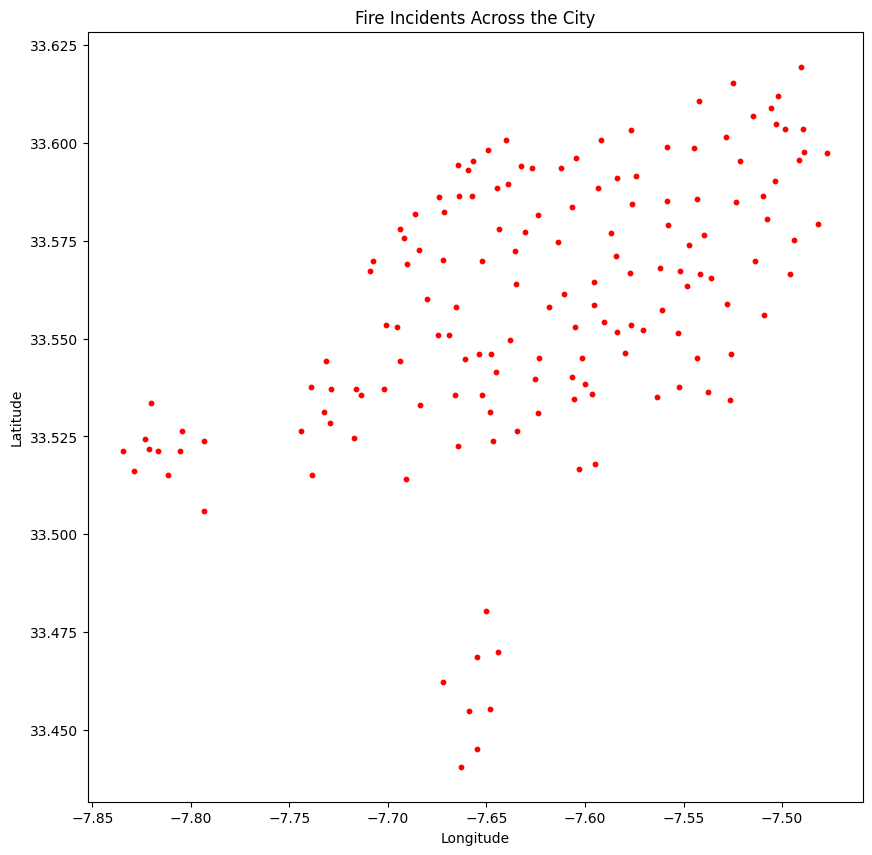

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(geo_data['x'], geo_data['y'], s=10, color='red')
plt.title("Fire Incidents Across the City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [19]:
# Calculate the map center
map_center = [geo_data['y'].mean(), geo_data['x'].mean()]

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each incident
for idx, row in geo_data.iterrows():
    folium.Marker(
        location=[row['y'], row['x']],
        popup=f"Incident ID: {row['id']}"
    ).add_to(m)

# Display the map
m

In [9]:
from sklearn.cluster import KMeans

# Define the range of K values
k_range = range(1, 21)  # You can adjust this range based on your data

# List to store the WCSS values
wcss = []

# Extract coordinate data for clustering
clustering_data = geo_data[['x', 'y']]

# Calculate WCSS for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the clusters

c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

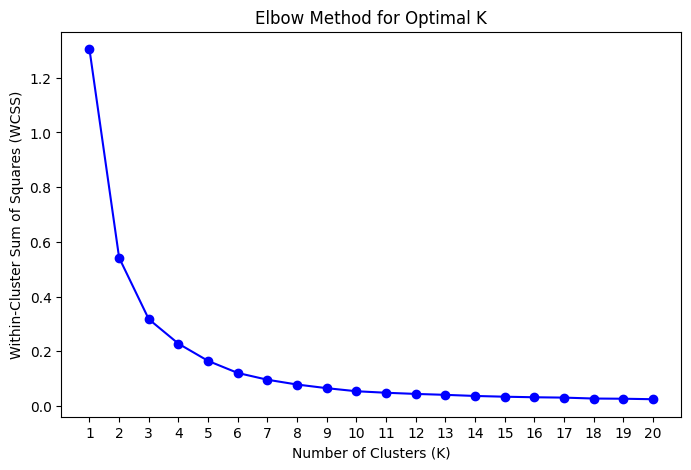

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_range)
plt.show()


c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


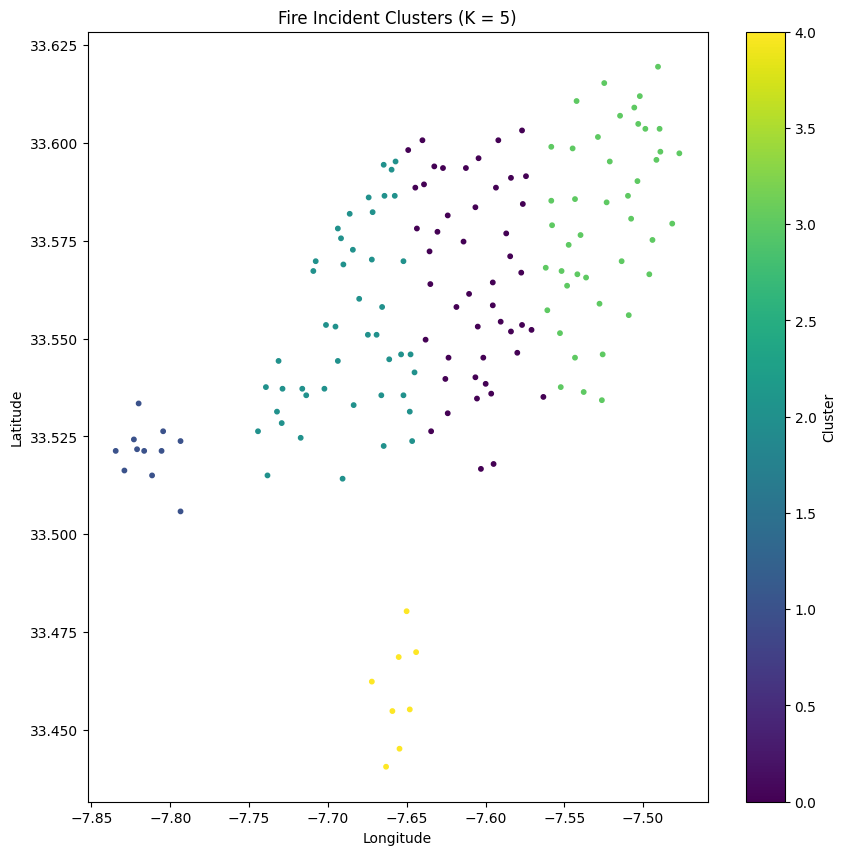

In [11]:
# Apply K-means clustering with K = 5
kmeans = KMeans(n_clusters=5, random_state=0)
geo_data['cluster'] = kmeans.fit_predict(clustering_data)

# Scatter plot of clusters
plt.figure(figsize=(10, 10))
plt.scatter(geo_data['x'], geo_data['y'], c=geo_data['cluster'], cmap='viridis', s=10)
plt.title("Fire Incident Clusters (K = 5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster')
plt.show()


In [25]:
from matplotlib import cm
import matplotlib.colors as mcolors


# Define a color map for clusters
colormap = cm.get_cmap('viridis', 5)  # 5 colors for 5 clusters
colors = [mcolors.to_hex(colormap(i)) for i in range(5)]

# Create a Folium map centered on the city's average coordinates
map_center = [geo_data['y'].mean(), geo_data['x'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map, colored by cluster
for _, row in geo_data.iterrows():
    folium.Marker(
        location=[row['y'], row['x']],
        popup=f"Incident ID: {row['id']} - Cluster: {row['cluster']}",
        icon=folium.Icon(color='white', icon_color=colors[row['cluster']])
    ).add_to(m)

# Display the map
m


C:\Users\xelor\AppData\Local\Temp\ipykernel_23444\1395256432.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', 5)  # 5 colors for 5 clusters


In [32]:
from geopy.geocoders import Nominatim
import time
import pandas as pd

# Initialize Geolocator for reverse geocoding
geolocator = Nominatim(user_agent="MyFireIncidentAnalysisApp")

# Function to get place names from coordinates with improved error handling
def get_place_name(lat, lon):
    retries = 5  # Number of retries for failed requests
    for attempt in range(retries):
        try:
            time.sleep(1)  # Sleep for 1 second between requests
            location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)  # Increased timeout
            if location:
                return location.raw['address'].get('suburb', 'Unknown')
        except Exception as e:
            print(f"Error retrieving location for {lat}, {lon}: {e}")
            time.sleep(5)  # Wait longer before retrying
    return "Unknown"

# Get place names for each point in geo_data
geo_data['place'] = geo_data.apply(lambda row: get_place_name(row['y'], row['x']), axis=1)

# Create a summary DataFrame for the clusters
cluster_summary = geo_data.groupby('cluster').agg({
    'place': 'first',
    'id': 'count',
    'x': 'mean',
    'y': 'mean'
}).rename(columns={'id': 'incident_count'}).reset_index()

# Add cluster center coordinates to the summary DataFrame
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['x', 'y'])
cluster_summary[['center_x', 'center_y']] = centers

# Display the summary DataFrame
print(cluster_summary)


   cluster                                place  incident_count         x  \
0        0      Ancienne Medina المدينة القديمة               0 -7.606917   
1        1                              Unknown               0 -7.813897   
2        2                  Aïn Diab عين الذئاب               0 -7.685930   
3        3  Sidi Othmane ⵙⵉⴷⵉ ⵄⵓⵜⵎⴰⵏ سيدي عثمان               0 -7.524007   
4        4                              Unknown               0 -7.655750   

           y  center_x   center_y  
0  33.565310 -7.606917  33.565310  
1  33.520958 -7.813897  33.520958  
2  33.552853 -7.685930  33.552853  
3  33.580422 -7.524007  33.580422  
4  33.459610 -7.655750  33.459610  


In [33]:
import requests
import time

# Your OpenCage API key
api_key = 'f0552a4584e24000b73d7cf87f527635'

# Function to get place names from coordinates using OpenCage Geocoding API
def get_place_name(lat, lon):
    retries = 5  # Number of retries for failed requests
    for attempt in range(retries):
        try:
            url = f'https://api.opencagedata.com/geocode/v1/json?q={lat},{lon}&key={api_key}'
            response = requests.get(url)
            if response.status_code == 200:
                results = response.json()
                if results['results']:
                    return results['results'][0]['components'].get('suburb', 'Unknown')
            else:
                print(f"Error {response.status_code}: {response.text}")
        except Exception as e:
            print(f"Error retrieving location for {lat}, {lon}: {e}")
            time.sleep(2)  # Wait before retrying
    return "Unknown"

# Get place names for each point in geo_data
geo_data['place'] = geo_data.apply(lambda row: get_place_name(row['y'], row['x']), axis=1)

# Create a summary DataFrame for the clusters
cluster_summary_OC = geo_data.groupby('cluster').agg({
    'place': 'first',
    'id': 'count',
    'x': 'mean',
    'y': 'mean'
}).rename(columns={'id': 'incident_count'}).reset_index()

# Add cluster center coordinates to the summary DataFrame
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['x', 'y'])
cluster_summary_OC[['center_x', 'center_y']] = centers

# Display the summary DataFrame
print(cluster_summary_OC)


   cluster                            place  incident_count         x  \
0        0  Ancienne Medina المدينة القديمة               0 -7.606917   
1        1                          Unknown               0 -7.813897   
2        2              Aïn Diab عين الذئاب               0 -7.685930   
3        3                     Sidi Othmane               0 -7.524007   
4        4                          Unknown               0 -7.655750   

           y  center_x   center_y  
0  33.565310 -7.606917  33.565310  
1  33.520958 -7.813897  33.520958  
2  33.552853 -7.685930  33.552853  
3  33.580422 -7.524007  33.580422  
4  33.459610 -7.655750  33.459610  


# K Means Scoring : 

In [12]:


from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette_avg = silhouette_score(clustering_data, geo_data['cluster'])
davies_bouldin = davies_bouldin_score(clustering_data, geo_data['cluster'])
calinski_harabasz = calinski_harabasz_score(clustering_data, geo_data['cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.45724753453069245
Davies-Bouldin Index: 0.6439931482321365
Calinski-Harabasz Index: 256.8365074530773


# Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Apply Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=5)
geo_data['cluster_agglom'] = agglom.fit_predict(clustering_data)

# Evaluate Agglomerative Clustering
silhouette_agglom = silhouette_score(clustering_data, geo_data['cluster_agglom'])
dbi_agglom = davies_bouldin_score(clustering_data, geo_data['cluster_agglom'])
ch_agglom = calinski_harabasz_score(clustering_data, geo_data['cluster_agglom'])

print("Silhouette Score:", silhouette_agglom)
print("Davies-Bouldin Index:", dbi_agglom)
print("Calinski-Harabasz Index:", ch_agglom)


Silhouette Score: 0.4570152585023455
Davies-Bouldin Index: 0.612403866544605
Calinski-Harabasz Index: 240.9842075179385


# DBSCAN : 

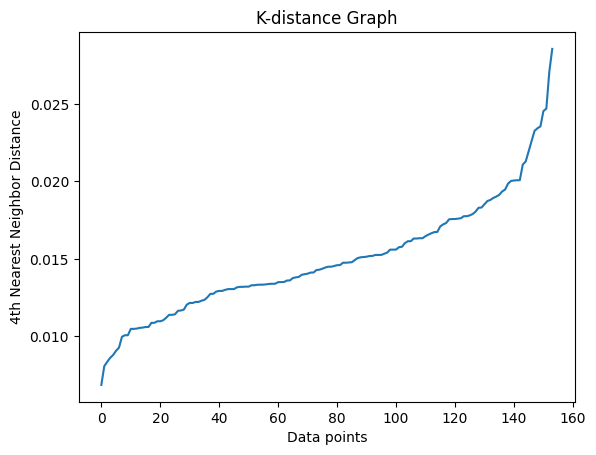

In [18]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Find the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(clustering_data)
distances, indices = neighbors_fit.kneighbors(clustering_data)

# Sort the distances and plot them
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


In [20]:
from sklearn.cluster import DBSCAN

# Adjust eps and min_samples based on the K-distance graph
dbscan = DBSCAN(eps=0.015, min_samples=3)
geo_data['dbscan_cluster'] = dbscan.fit_predict(clustering_data)

# Filter clustering_data to exclude noise points based on dbscan_cluster labels
filtered_data = clustering_data[geo_data['dbscan_cluster'] != -1]
filtered_labels = geo_data['dbscan_cluster'][geo_data['dbscan_cluster'] != -1]

# Ensure that there are enough clusters (at least 2) to evaluate
if len(set(filtered_labels)) > 1:
    print("Silhouette Score:", silhouette_score(filtered_data, filtered_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(filtered_data, filtered_labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(filtered_data, filtered_labels))
else:
    print("No clusters found or only one cluster present after noise filtering.")


Silhouette Score: 0.3434194660564094
Davies-Bouldin Index: 0.5256186951496915
Calinski-Harabasz Index: 125.5197960391652


# Gaussian Mixture Model (GMM) 

In [24]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)
geo_data['cluster_gmm'] = gmm.fit_predict(clustering_data)

# Evaluate Gaussian Mixture Model
silhouette_gmm = silhouette_score(clustering_data, geo_data['cluster_gmm'])
dbi_gmm = davies_bouldin_score(clustering_data, geo_data['cluster_gmm'])
ch_gmm = calinski_harabasz_score(clustering_data, geo_data['cluster_gmm'])

print("Silhouette Score:", silhouette_gmm)
print("Davies-Bouldin Index:", dbi_gmm)
print("Calinski-Harabasz Index:", ch_gmm)


Silhouette Score: 0.397171518842064
Davies-Bouldin Index: 0.7065420794689551
Calinski-Harabasz Index: 193.11388375257357


# Spectral Clustering : 

In [25]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=0)
geo_data['cluster_spectral'] = spectral.fit_predict(clustering_data)

# Evaluate Spectral Clustering
silhouette_spectral = silhouette_score(clustering_data, geo_data['cluster_spectral'])
dbi_spectral = davies_bouldin_score(clustering_data, geo_data['cluster_spectral'])
ch_spectral = calinski_harabasz_score(clustering_data, geo_data['cluster_spectral'])

print("Silhouette Score:", silhouette_spectral)
print("Davies-Bouldin Index:", dbi_spectral)
print("Calinski-Harabasz Index:", ch_spectral)


Silhouette Score: 0.3778418775591281
Davies-Bouldin Index: 0.8593430934688137
Calinski-Harabasz Index: 179.7723608384141


c:\Users\xelor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
